<a href="https://colab.research.google.com/github/myke11j/fast-ai-deep-learning-course/blob/master/Lesson_1_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

from fastai.datasets import untar_data
from fastai.vision.data import get_image_files

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_image = path/'images'
path_annotation = path/'annotation'

In [0]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c:Union[pathlib.Path, str], check_ext:bool=True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [0]:
fnames = get_image_files(path_image)

In [0]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_70.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_109.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_94.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_150.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
bs = 64 # use smaller number, if memmory error happens
data = ImageDataBunch.from_name_re(
    path_image, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
).normalize(imagenet_stats)

In [0]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,Birman,american_bulldog,Bengal,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,leonberger,english_setter,Ragdoll,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

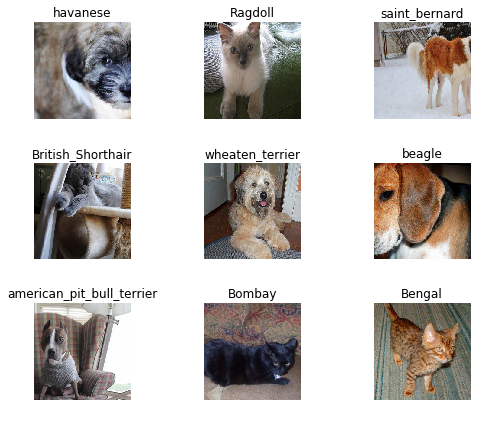

In [0]:
data.show_batch(rows=3, figsize=(7,6))


# Train the model

In [0]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.359717,0.348492,0.098782,01:52
1,0.560426,0.242769,0.073748,01:53
2,0.350854,0.206667,0.066982,01:53
3,0.261703,0.205716,0.064953,01:55


In [0]:
learner.save('stage-1')


# Result

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

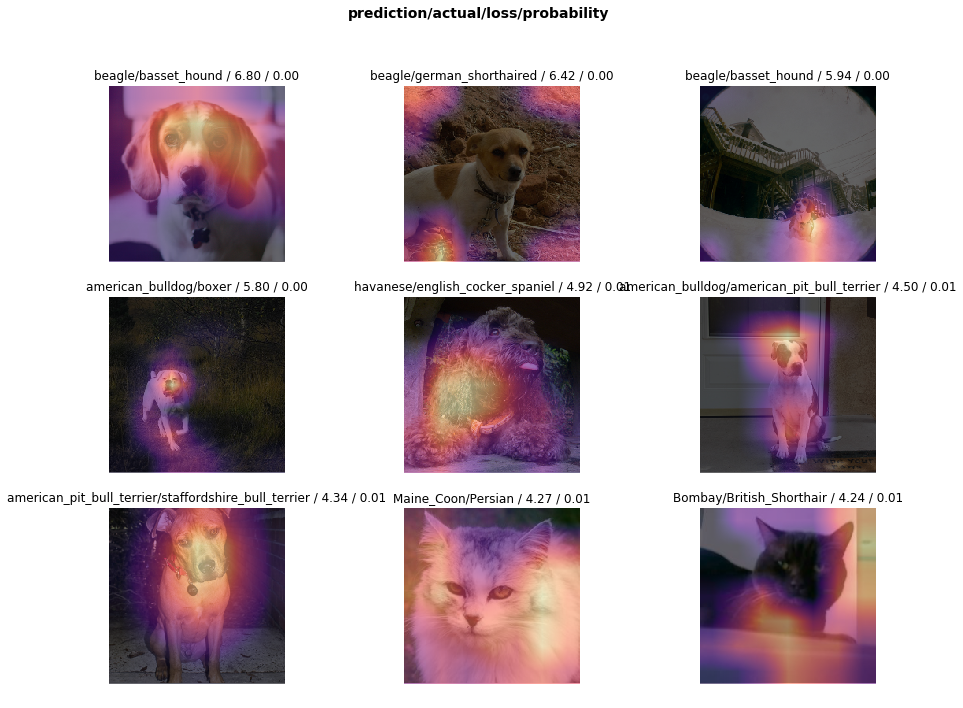

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Abyssinian', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('english_cocker_spaniel', 'havanese', 3),
 ('keeshond', 'leonberger', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('german_shorthaired', 'beagle', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

# Unfreezing, fine-tuning and learning rates

In [0]:
learner.unfreeze()

In [0]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.520036,0.288920,0.089986,02:00


In [0]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,Birman,american_bulldog,Bengal,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,leonberger,english_setter,Ragdoll,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


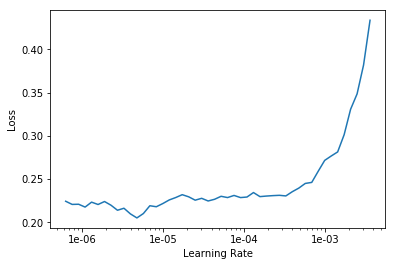

In [0]:
learner.recorder.plot()